<a href="https://colab.research.google.com/github/muscak/Loan-Prediction/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Return Prediction

A loan is a form of debt incurred by an individual or other entity. The lender - usually a corporation, financial institution, or government - advances a sum of money to the borrower. In return, the borrower agrees to a certain set of terms including any finance charges, interest, repayment date, and other conditions.

We are going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Modelling using Deep Neural Network 

## Problem Defition

It's better to know for the loaner if how likely an individual or an entity will pay the loan back or not in advance. From this angle this is a binary classification problem. That's why our target is to build a Machine Learning model which can predict it with high accuracy.

## Data

The sample dataset is taken from the [Kaggle](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set). The dataset has 12 columns. It has 11  features to be used predicting the label which is Status columns in the dataset. You can see the data dictionary [here](Data/README.md).

## Evaluation

> If we can reach more than 90% accuracy at predicting whether or not a customer is going to come back and purchase new audiobook, we'll pursue the project.

<div class='alert alert-info' style='border-radius:10px;background-color:white;'>
⚠️ Note: Due to the nature of experimentation, the evaluation metric may change over time.
</div>

## Import Libraries

We're going to use:
- [pandas](https://pandas.pydata.org/) for data analysis.
- [NumPy](https://numpy.org/) for numerical operations.
- [Matplotlib](https://matplotlib.org/) / [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
- [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [6]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set(style="ticks")

# Libraries to connect a data file in the google drive to create the model on Google Colab.
# While working on local computer no need for these libraries. 
from google.colab import files
from google.colab import drive

# Preprocessing the data
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Linear Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Non-linear Models from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Ensemble Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

## Load Data

In [7]:
drive.mount('/content/gdrive') # While working on local computer no need for this function. 

Mounted at /content/gdrive


In [9]:
raw_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Loan-Prediction/Data/loan_train.csv')
raw_data.shape # number of rows and columns

(614, 12)

## Data Exploration (Exploratory Data Analysis - EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [10]:
# Keeping the original dataset aside just in case
df = raw_data.copy() 

In [11]:
# It's essential to always eyeball your data first!
# Check for error!
pd.options.display.max_columns = None
pd.options.display.max_rows = None
display(df)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.000000e+00,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,1.508000e+05,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.000000e+00,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,2.358000e+05,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.000000e+00,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,4.196000e+05,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,1.516000e+05,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,2.504000e+05,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,1.526000e+05,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1.096800e+06,34900000,360.0,1.0,Semiurban,N


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


✍🏼 **Observations**

- Dependens column contains 3+ values which makes it an object.
- Many of the columns has null values which needs to be handled in a way.

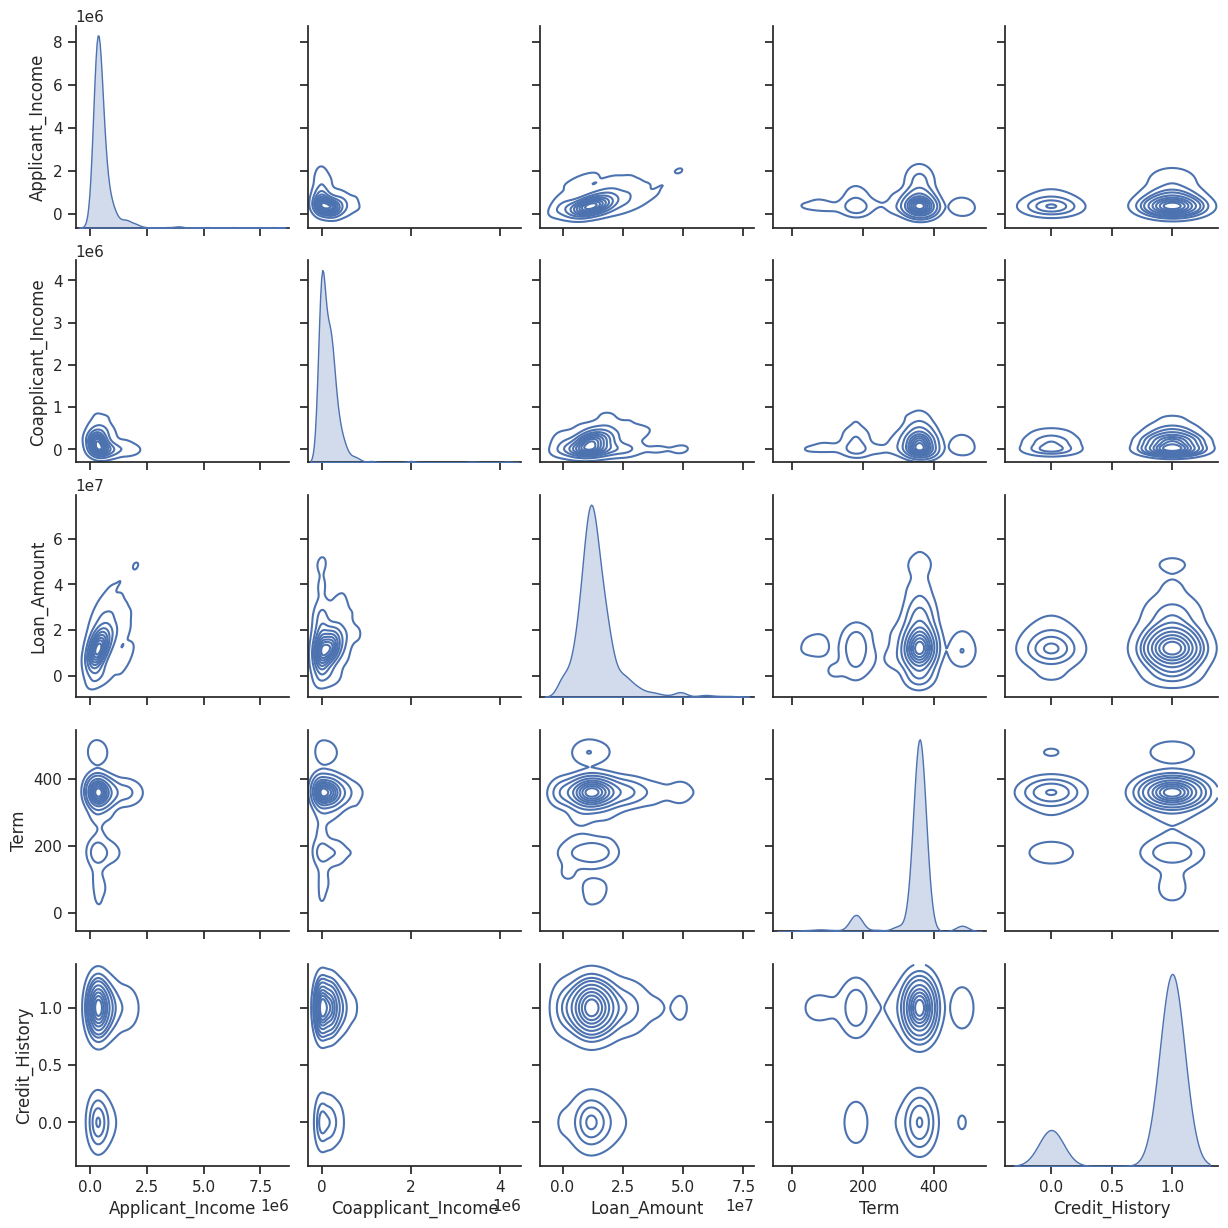

In [20]:
sb.pairplot(df.drop('Status', axis=1), kind='kde', diag_kind='kde')
plt.show()

In [17]:
count = len(df['Status'])
count_y = df['Status'].value_counts()[0]
count_n = count - count_y
print('Y: %d %.2f%%' % (count_y, (count_y/count)*100))
print('N: %d %.2f%%' % (count_n, (count_n/count)*100))

Y: 422 68.73%
N: 192 31.27%


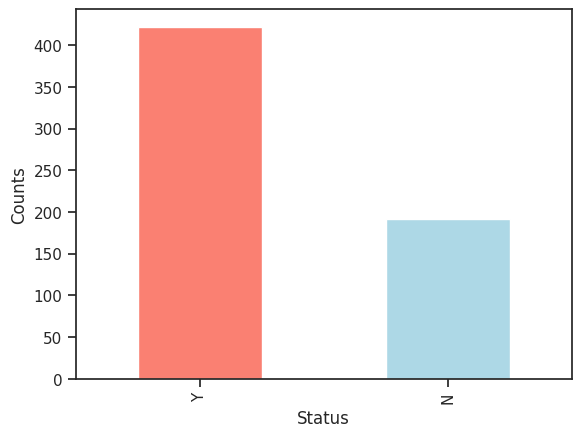

In [14]:
df['Status'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('Status')
plt.ylabel('Counts')
plt.show()

✍🏼 **Observations:** The dataset needs balancing. Otherwise, even a wild guess will have a chance around 70% that it's going to be correct.

## Data Preprocessing

### Drop the columns that we'll not use

In [ ]:
df.drop(['ID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Book length (mins)_overall        14084 non-null  float64
 1   Book length (mins)_avg            14084 non-null  int64  
 2   Price_overall                     14084 non-null  float64
 3   Price_avg                         14084 non-null  float64
 4   Review                            14084 non-null  int64  
 5   Review 10/10                      14084 non-null  float64
 6   Minutes listened                  14084 non-null  float64
 7   Completion                        14084 non-null  float64
 8   Support Requests                  14084 non-null  int64  
 9   Last visited minus Purchase date  14084 non-null  int64  
 10  Targets                           14084 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.2 MB


### Determine the Features and Targets

In [ ]:
x = df.drop('Targets', axis=1)
y = df['Targets']

### Balancing the Dataset

We'll use `RandomUnderSampler` from `imblearn` library. We'll set `random_state` parameter to `101` for reproducing purpose. Also, `sampling_strategy` will be set to `majority` which will undersample the majority class determined by the class with the largest number of examples.

0    2237
1    2237
Name: Targets, dtype: int64


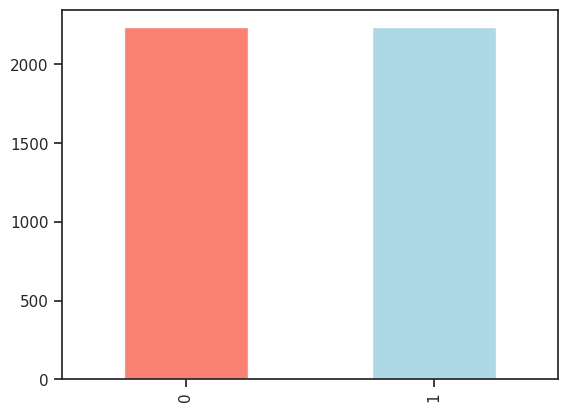

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=101)

x_under, y_under = undersample.fit_resample(x, y)

print(y_under.value_counts())

y_under.value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.show()